In [ ]:
import pandas as pd

In [6]:
from const import *

In [2]:
df = pd.read_csv('./kaggle/input/nfl-big-data-bowl-2026-prediction/train/input_2023_w01.csv')
df.head()

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023090700,101,False,54527,1,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.09,0.39,322.40,238.24,21,63.259998,-0.22
1,2023090700,101,False,54527,2,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2,2023090700,101,False,54527,3,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.93,0.12,0.73,147.55,240.60,21,63.259998,-0.22
3,2023090700,101,False,54527,4,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.35,36.92,0.23,0.81,131.40,244.25,21,63.259998,-0.22
4,2023090700,101,False,54527,5,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.37,36.90,0.35,0.82,123.26,244.25,21,63.259998,-0.22


In [39]:
df[PLAYER_ROLE].unique()

array(['Defensive Coverage', 'Other Route Runner', 'Passer',
       'Targeted Receiver'], dtype=object)

In [21]:
target_df = df[(df[PLAYER_TO_PREDICT]) & (df[PLAYER_POSITION] == 'WR')]
target_df.head()

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
208,2023090700,101,True,44930,1,right,42,Josh Reynolds,6-3,196,...,Targeted Receiver,41.03,12.17,0.00,0.00,156.35,80.97,21,63.259998,-0.22
209,2023090700,101,True,44930,2,right,42,Josh Reynolds,6-3,196,...,Targeted Receiver,41.03,12.17,0.00,0.00,119.09,82.26,21,63.259998,-0.22
210,2023090700,101,True,44930,3,right,42,Josh Reynolds,6-3,196,...,Targeted Receiver,41.05,12.18,0.02,0.47,65.03,83.33,21,63.259998,-0.22
211,2023090700,101,True,44930,4,right,42,Josh Reynolds,6-3,196,...,Targeted Receiver,41.07,12.20,0.18,1.54,56.06,84.29,21,63.259998,-0.22
212,2023090700,101,True,44930,5,right,42,Josh Reynolds,6-3,196,...,Targeted Receiver,41.11,12.22,0.57,3.09,59.41,88.21,21,63.259998,-0.22


In [24]:
def extract_points(play_group):
    """
    Extract (x, y) coordinate tuples from a player's dataframe.
    
    Args:
        play_group: DataFrame with X and Y columns for a single player
        
    Returns:
        List of (x, y) tuples
    """
    points = list(zip(play_group[X], play_group[Y]))
    return points

In [26]:
import matplotlib.pyplot as plt

In [31]:
def plot_points(points, game_id=None, play_id=None):
    """
    Plot (x, y) coordinate points on a field-sized plot.
    
    Args:
        points: List of (x, y) tuples
        game_id: Optional game identifier for title
        play_id: Optional play identifier for title
    """
    # Extract x and y coordinates
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    
    # Create the plot
    plt.figure(figsize=(12, 5))
    
    # Set limits to show full field with buffer
    plt.xlim(-5, 125)  # 0-120 with 5 yard buffer
    plt.ylim(-5, 58)   # 0-53 with 5 yard buffer
    
    # Plot the points
    plt.plot(x_coords, y_coords, 'b-o', markersize=4, linewidth=1)
    
    # Mark start and end
    plt.plot(x_coords[0], y_coords[0], 'go', markersize=10, label='Start')
    plt.plot(x_coords[-1], y_coords[-1], 'ro', markersize=10, label='End')
    
    # Labels and grid
    plt.xlabel('X (yards)')
    plt.ylabel('Y (yards)')
    
    title = 'Player Trajectory'
    if game_id and play_id:
        title = f'Game: {game_id}, Play: {play_id}'
    plt.title(title)
    
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Remove axis('equal') so axes scale independently
    plt.gca().set_aspect('auto')
    
    plt.show()

In [ ]:
import matplotlib.patches as patches

def plot_multiple_points(points_array, ball_land=None,game_id=None, play_id=None, labels=None):
    """
    Plot multiple (x, y) coordinate trajectories on a field-sized plot.
    
    Args:
        points_array: List of lists of (x, y) tuples - [[points1], [points2], ...]
        game_id: Optional game identifier for title
        play_id: Optional play identifier for title
        labels: Optional list of labels for each trajectory
    """
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 5))
    
    # Draw football field background
    # Main field (green)
    field = patches.Rectangle((0, 0), 120, 53.3, linewidth=2, 
                              edgecolor='white', facecolor='#2d5016', zorder=0)
    ax.add_patch(field)
    
    # End zones (darker green)
    left_endzone = patches.Rectangle((-10, 0), 10, 53.3, linewidth=0, 
                                     facecolor='#1a3d0a', zorder=0)
    right_endzone = patches.Rectangle((120, 0), 10, 53.3, linewidth=0, 
                                      facecolor='#1a3d0a', zorder=0)
    ax.add_patch(left_endzone)
    ax.add_patch(right_endzone)
    
    # Draw yard lines
    for yard in range(0, 121, 10):
        ax.plot([yard, yard], [0, 53.3], 'w-', linewidth=1, alpha=0.5, zorder=1)
    
    # Draw sidelines
    ax.plot([0, 120], [0, 0], 'w-', linewidth=2, zorder=1)
    ax.plot([0, 120], [53.3, 53.3], 'w-', linewidth=2, zorder=1)
    
    # Set limits to show full field with buffer (endzones)
    ax.set_xlim(-10, 130)
    ax.set_ylim(-5, 58.3)
    
    # Plot each trajectory
    colors = plt.cm.tab10(range(len(points_array)))  # Get distinct colors
    
    for i, points in enumerate(points_array):
        # Extract x and y coordinates
        x_coords = [p[0] for p in points]
        y_coords = [p[1] for p in points]
        
        # Determine label
        label = labels[i] if labels and i < len(labels) else f'Player {i+1}'
        
        # Plot the trajectory
        ax.plot(x_coords, y_coords, '-o', markersize=5, linewidth=2, 
                color=colors[i], label=label, alpha=0.9, zorder=2)
        
        # Add arrow at the end
        if len(points) >= 2:
            dx = x_coords[-1] - x_coords[-2]
            dy = y_coords[-1] - y_coords[-2]
            ax.arrow(x_coords[-2], y_coords[-2], dx, dy, 
                     head_width=2, head_length=1.5, 
                     fc=colors[i], ec=colors[i], linewidth=2, zorder=3)
    
    # Labels and grid
    ax.set_xlabel('X (yards)', color='white', fontsize=12)
    ax.set_ylabel('Y (yards)', color='white', fontsize=12)
    
    title = 'Player Trajectories'
    if game_id and play_id:
        title = f'Game: {game_id}, Play: {play_id}'
    ax.set_title(title, color='white', fontsize=14, fontweight='bold')
    
    # Style adjustments for football field look
    ax.set_facecolor('#2d5016')
    fig.patch.set_facecolor('#1a1a1a')
    ax.tick_params(colors='white')
    ax.legend(facecolor='#1a1a1a', edgecolor='white', labelcolor='white')
    ax.set_aspect('auto')
    
    plt.tight_layout()
    plt.show()

In [63]:
def get_player_points_array(df, game_id, play_id):
    """
    Extract points for all players in a specific game and play.
    
    Args:
        df: DataFrame with player tracking data
        game_id: Game identifier
        play_id: Play identifier
        
    Returns:
        points_array: List of lists of (x, y) tuples, one per player
        labels: List of player labels/names
        ball_land: Tuple of (x, y) for where ball landed, or None if not available
    """
    # Filter to specific game and play
    play_df = df[(df[GAME_ID] == game_id) & (df[PLAY_ID] == play_id)]
    
    # Sort by frame to ensure correct order
    play_df = play_df.sort_values(FRAME_ID)
    
    points_array = []
    labels = []
    
    # Get ball landing position (should be same for all rows in this play)
    ball_land = None
    if BALL_LAND_X in play_df.columns and BALL_LAND_Y in play_df.columns:
        ball_x = play_df[BALL_LAND_X].iloc[0]
        ball_y = play_df[BALL_LAND_Y].iloc[0]
        if pd.notna(ball_x) and pd.notna(ball_y):
            ball_land = (ball_x, ball_y)
    
    # Group by player (NFL_ID)
    for nfl_id, player_group in play_df.groupby(NFL_ID):
        # Extract points for this player
        points = list(zip(player_group[X], player_group[Y]))
        points_array.append(points)
        
        # Create label (use player name if available, otherwise NFL_ID)
        if PLAYER_NAME in player_group.columns:
            player_name = player_group[PLAYER_NAME].iloc[0]
            labels.append(player_name)
        else:
            labels.append(f'Player {nfl_id}')
    
    return points_array, labels, ball_land

In [43]:
def is_offensive_player(player_role):
    return player_role.isin(['Other Route Runner', 'Passer', 'Targeted Receiver'])

In [50]:
off_df = df[is_offensive_player(df[PLAYER_ROLE])]
off_df.head()
off_df[PLAYER_POSITION].unique()


array(['WR', 'TE', 'QB', 'RB', 'FB'], dtype=object)

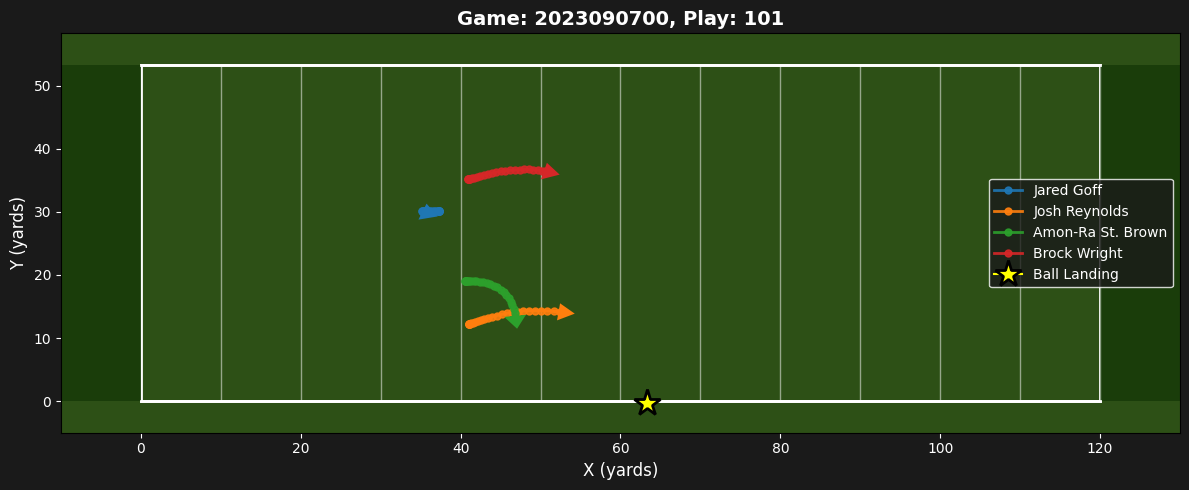

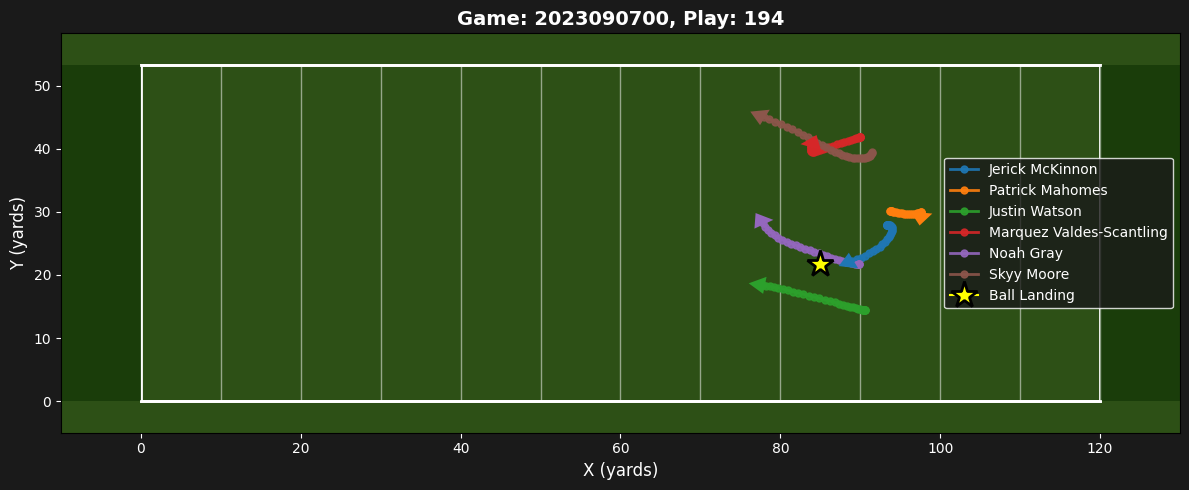

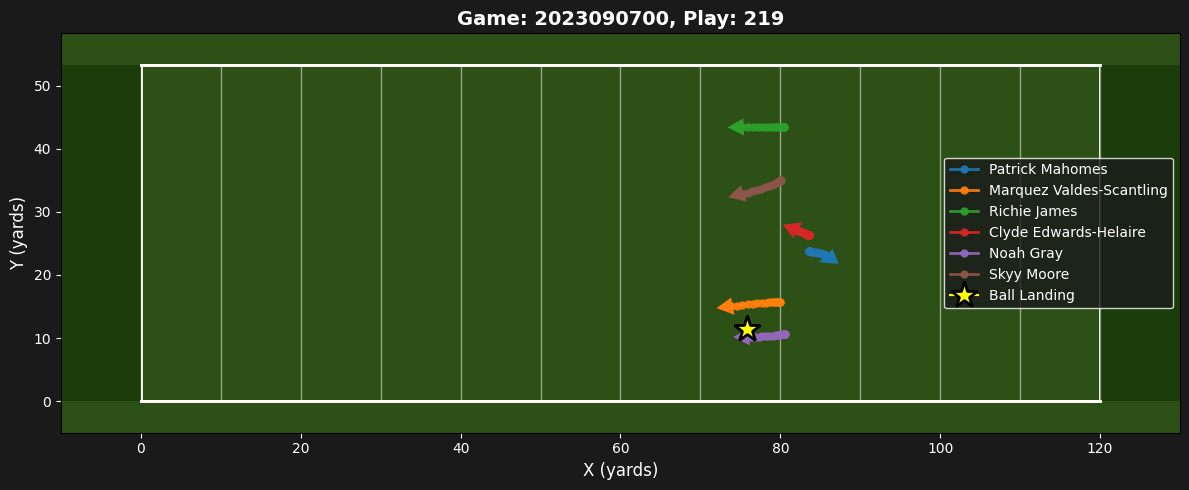

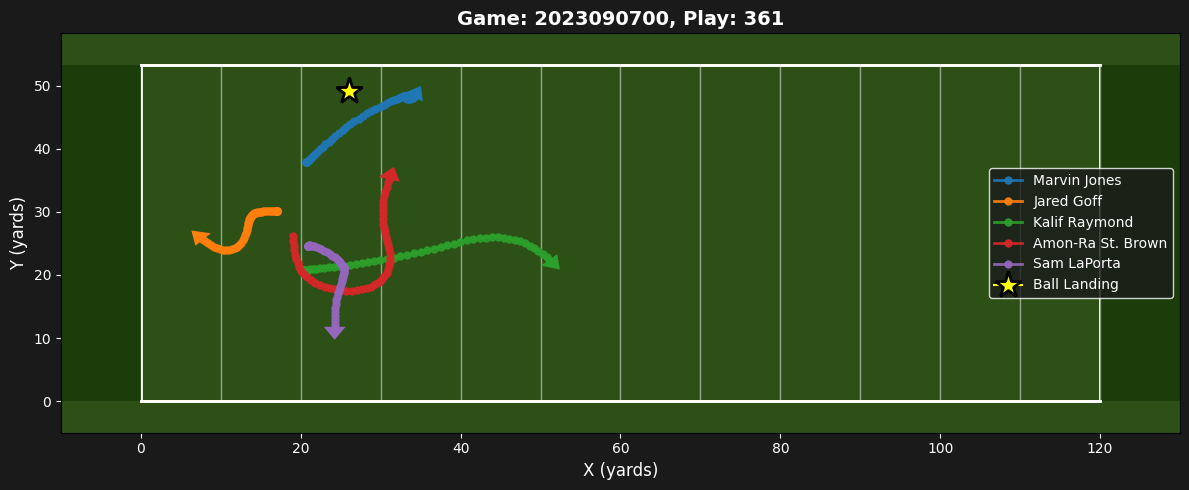

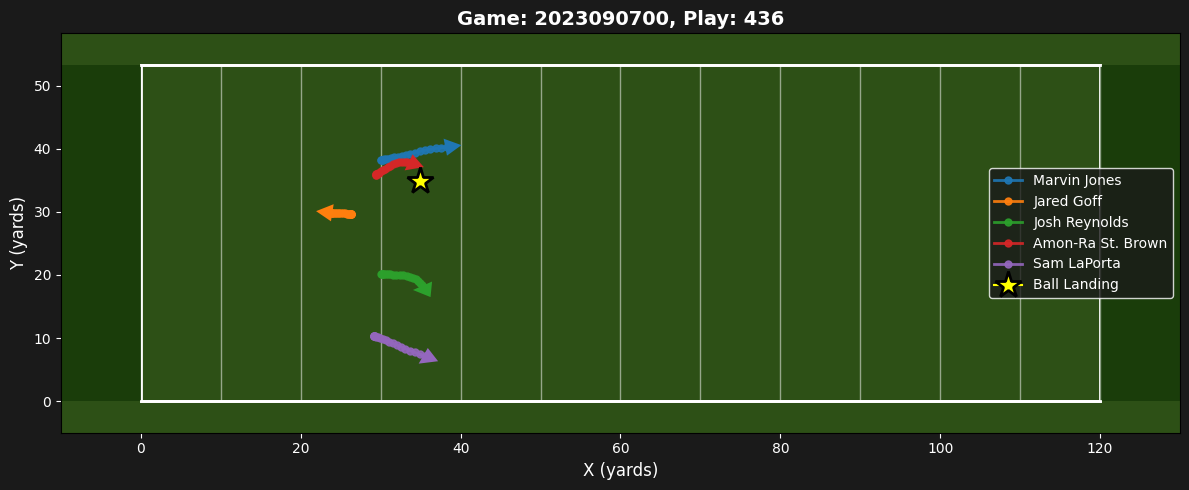

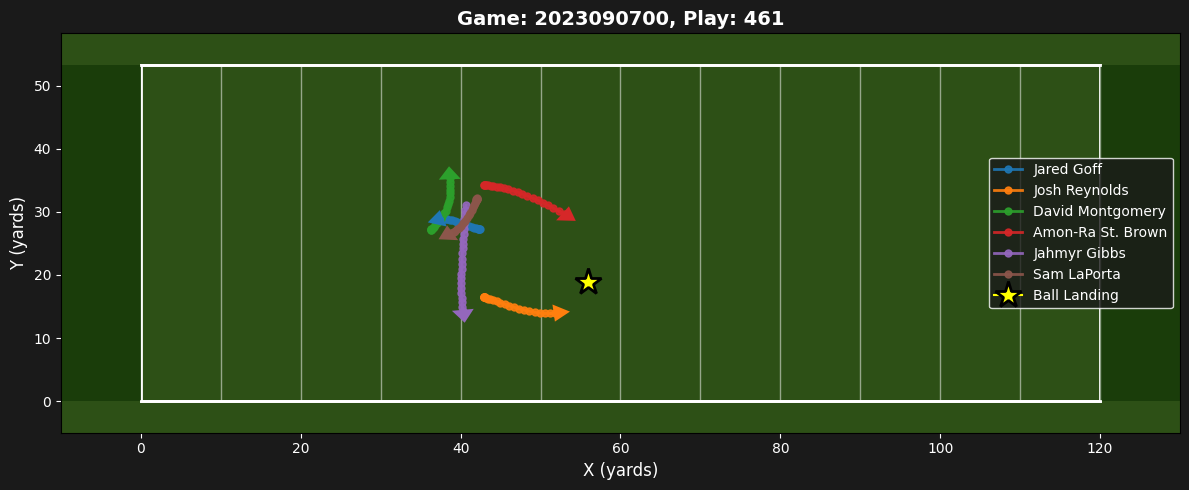

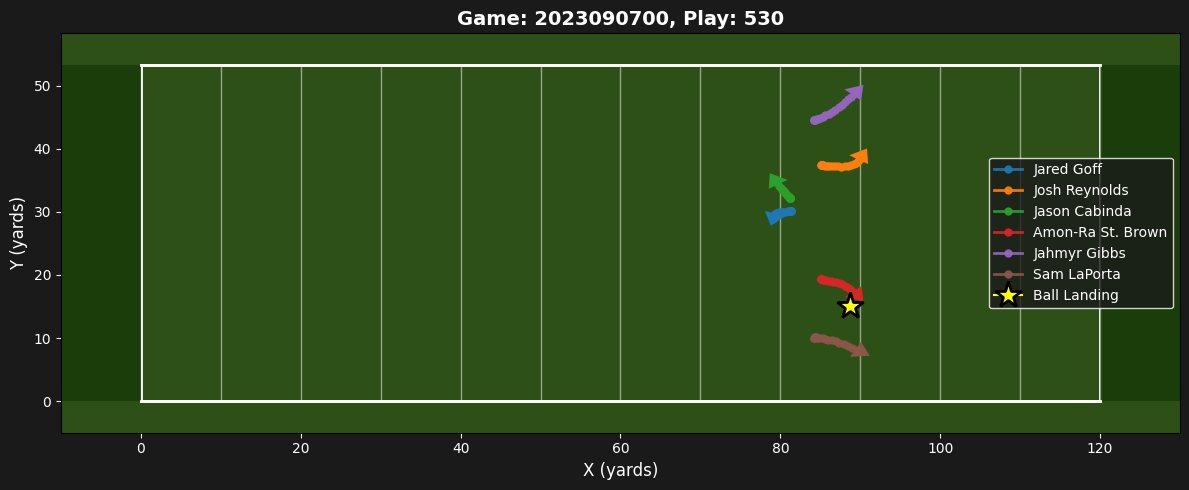

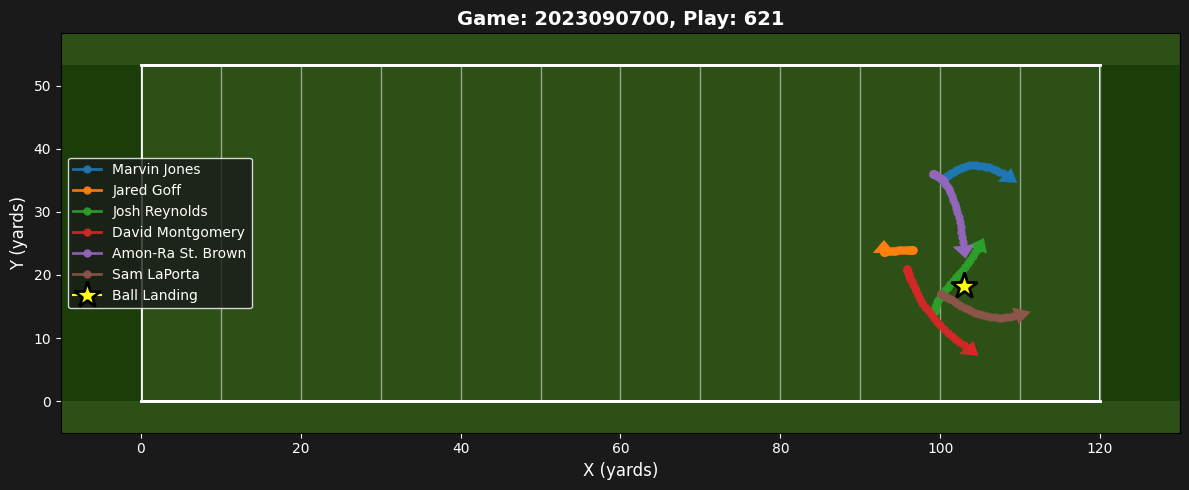

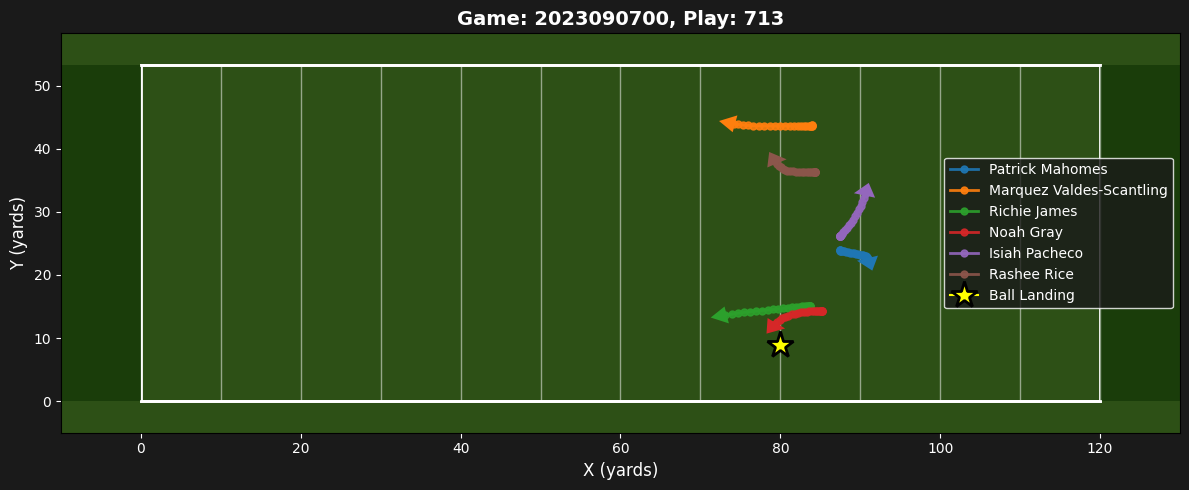

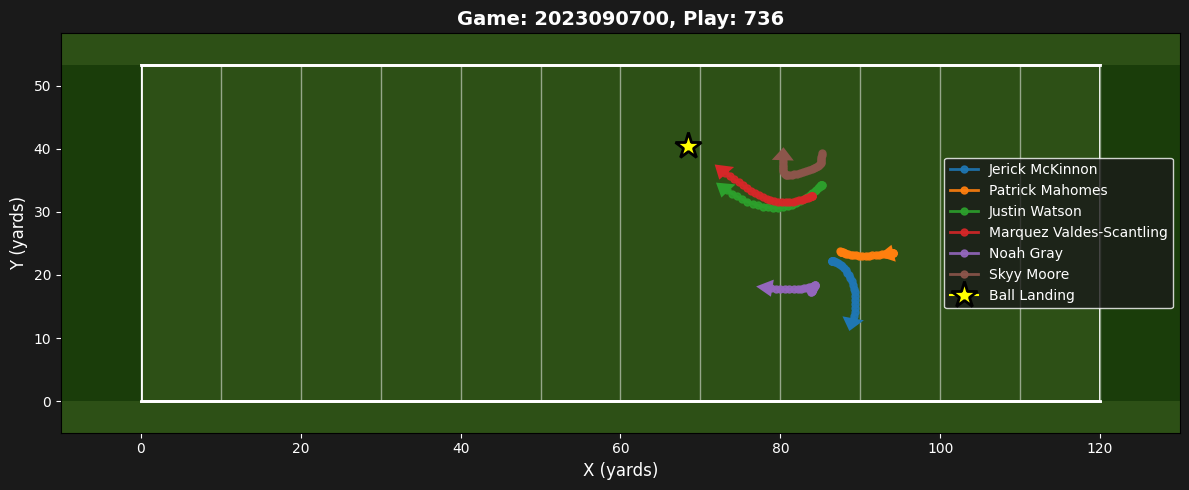

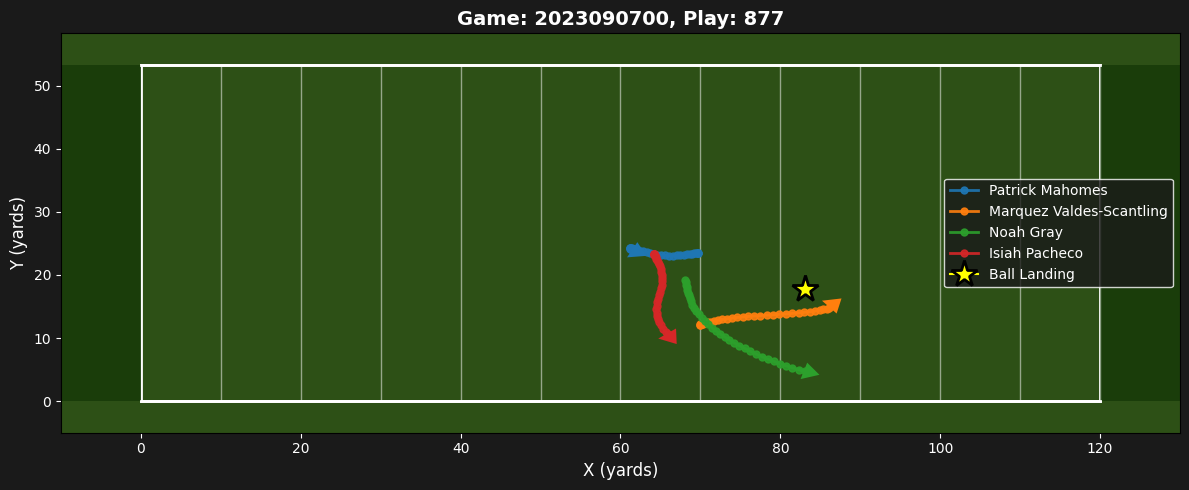

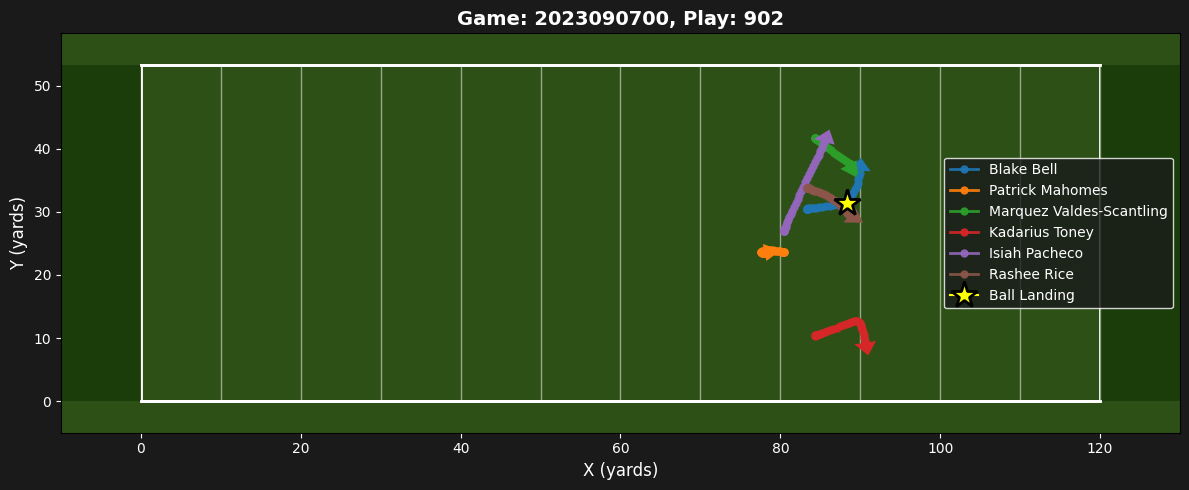

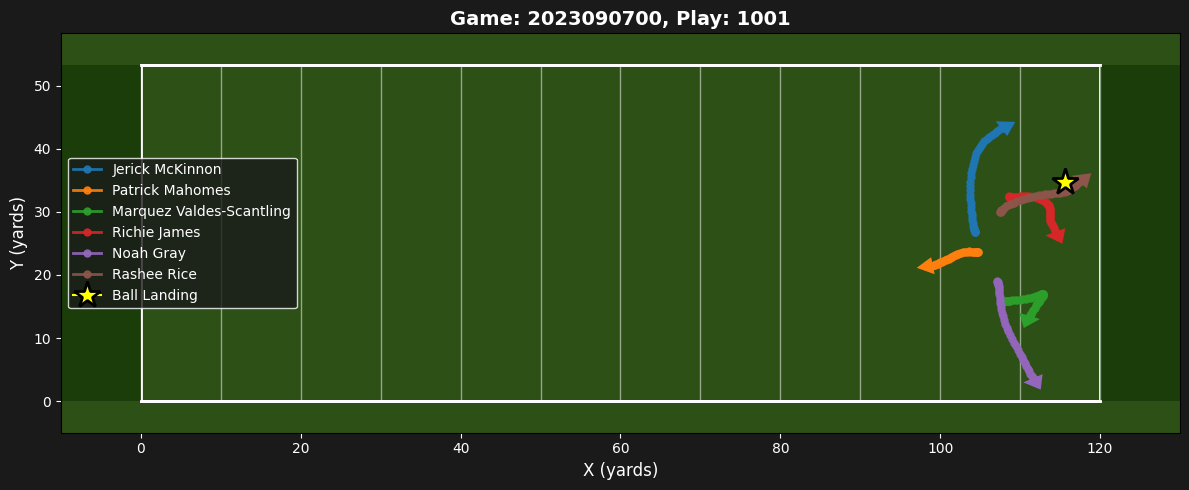

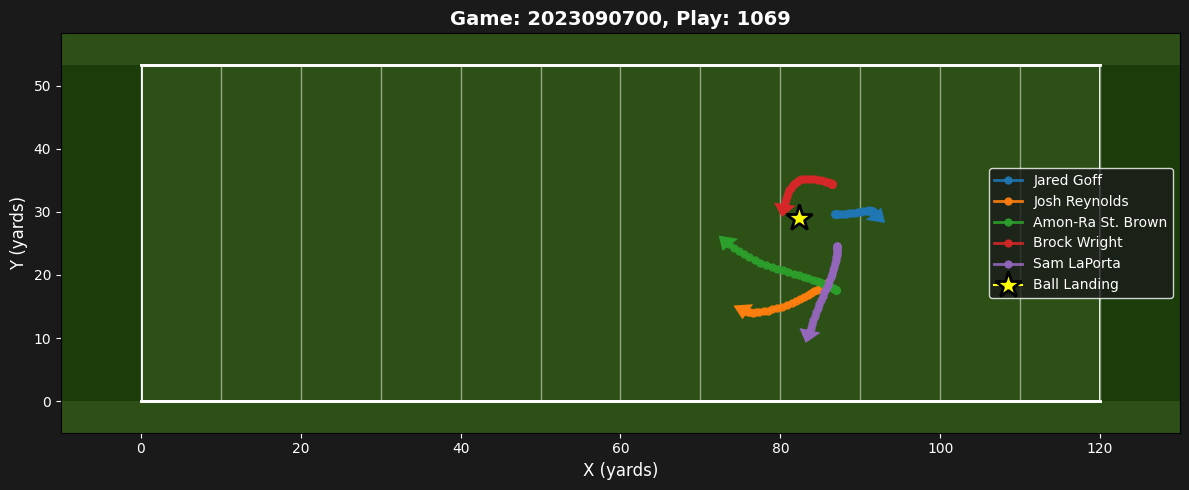

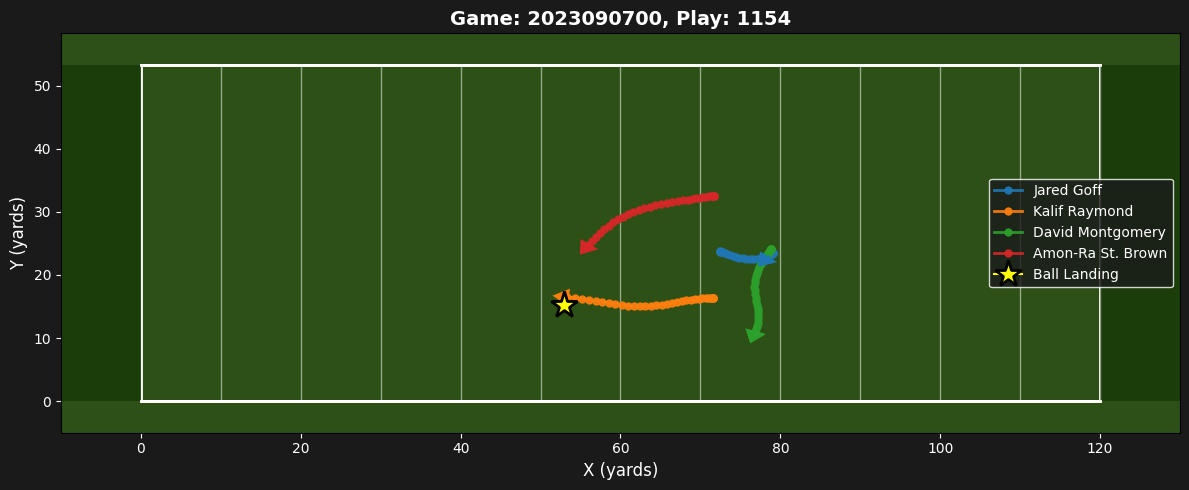

In [72]:
count = 0
show = 15

for game_id, game_group in off_df.groupby(GAME_ID):
    for play_id in game_group[PLAY_ID].unique():
        if count >= show: 
            break
        points_array, labels, ball_land = get_player_points_array(off_df, game_id, play_id)
        plot_multiple_points(points_array, ball_land=ball_land, game_id=game_id, play_id=play_id, labels=labels)
        
        count += 1